# Inicialização

In [75]:
# Necessary imports
import pandas as pd
import numpy as np
import math
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import gc

from ast import literal_eval

#default_color = '#56B4E9'
#colormap = plt.cm.cool
#sns.set_palette(sns.color_palette("coolwarm", 7))
#sns.set_palette("pastel")

%matplotlib inline

In [76]:
import matplotlib.style as style
style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [115]:
style.use('seaborn-white')

In [45]:
acq_train = pd.read_csv('data/acquisition_train.csv')
acq_test = pd.read_csv('data/acquisition_test.csv')
spend_train = pd.read_csv('data/spend_train.csv')

In [46]:
acq_train['lat_lon'] = acq_train['lat_lon'].apply(lambda x: literal_eval(x) if pd.notnull(x) else x)
acq_test['lat_lon'] = acq_test['lat_lon'].apply(lambda x: literal_eval(x) if pd.notnull(x) else x)

acq_train[['lat','lon']] = acq_train['lat_lon'].apply(pd.Series)
acq_test[['lat','lon']] = acq_test['lat_lon'].apply(pd.Series)

In [4]:
acq_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
ids                                                 45000 non-null object
target_default                                      41741 non-null object
score_1                                             44438 non-null object
score_2                                             44438 non-null object
score_3                                             44438 non-null float64
score_4                                             45000 non-null float64
score_5                                             45000 non-null float64
score_6                                             45000 non-null float64
risk_rate                                           44438 non-null float64
last_amount_borrowed                                15044 non-null float64
last_borrowed_in_months                             15044 non-null float64
credit_limit                                        31200 non-null flo

In [5]:
acq_train.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,...,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,4.500000e+04,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,...,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,...,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,4.030000e+02,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,5.094825e+04,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,1.017790e+05,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,...,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,1.513372e+05,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


# Exploração de dados

Nesta seção, faremos uma análise geral dos dados fornecidos. Primeiramente, investigamos a distribuição da inadimplência na base.

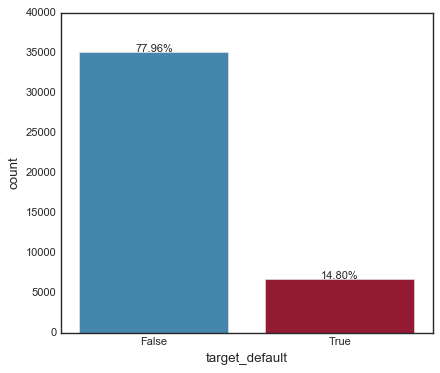

In [116]:
plt.figure(figsize=(6,5))
#plt.grid()

ax = sns.countplot('target_default',data=acq_train)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(acq_train['target_default'])), (p.get_x()+ 0.3, p.get_height()+100))

In [14]:
sum(acq_train['target_default'].isna())/len(acq_train['target_default'])*100

7.242222222222222

Podemos observar que a base é altamente enviesada com relação à inadimplência - quase 78% de todos os registros são clientes adimplentes. Precisaremos levar isto em conta depois, ao criar um modelo de predição.
Note ainda, que cerca de 7% dos valores estão faltando no alvo adimplência. 

Analisamos agora a o alvo fraude.

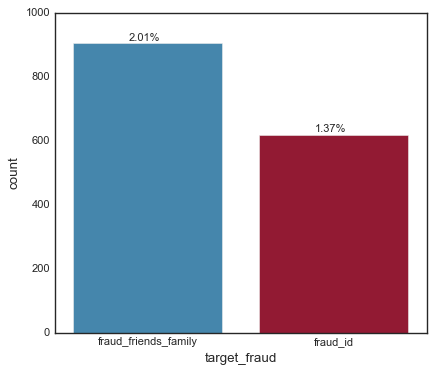

In [120]:
plt.figure(figsize=(6,5))
#plt.grid()

ax = sns.countplot('target_fraud',data=acq_train)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(acq_train['target_fraud'])), (p.get_x()+ 0.3, p.get_height()+10))

Observamos do gráfico acima que cerca de 2% dos fraudadores na base de dados são da classe 'amigos ou parentes'; e 1.37% se encaixam nos demais tipos de fraude. É importante notar que os dois somam menos que 4% do total, o que significa que a vasta maioria das observações não possui uma informação com relação a fraude. Isso pode ocorrer em dois casos: ou a pessoa não é fraudadora, ou ainda não sabemos que ela o é.

In [36]:
#acq_train['target_fraud_bin'] = acq_train['target_fraud'].apply(lambda x : False if pd.isna(x) else True)

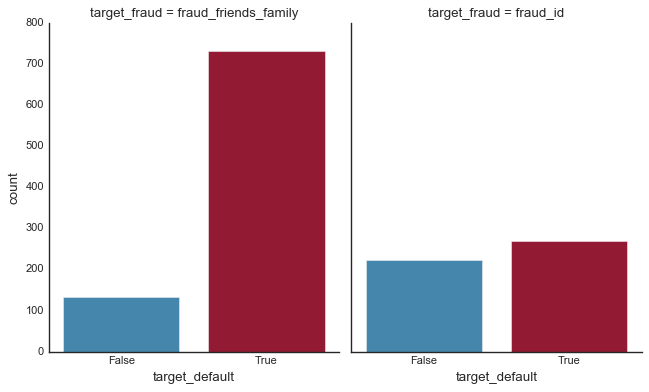

In [121]:
#plt.figure(figsize=(6,6))
sns.catplot(x="target_default", kind="count",
            col="target_fraud", data=acq_train,
            height=5, aspect=.8)

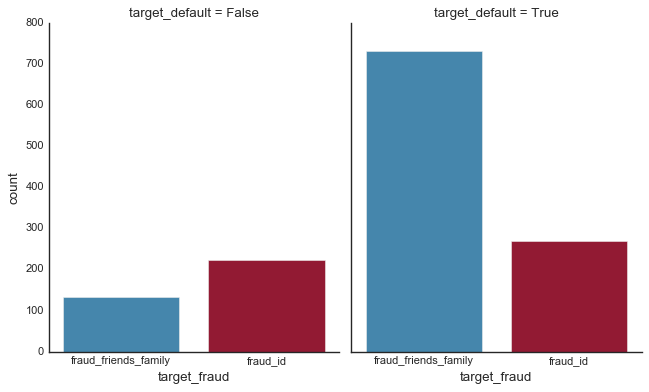

In [122]:
sns.catplot(x="target_fraud", kind="count",
            col="target_default", data=acq_train,
            height=5, aspect=.8)

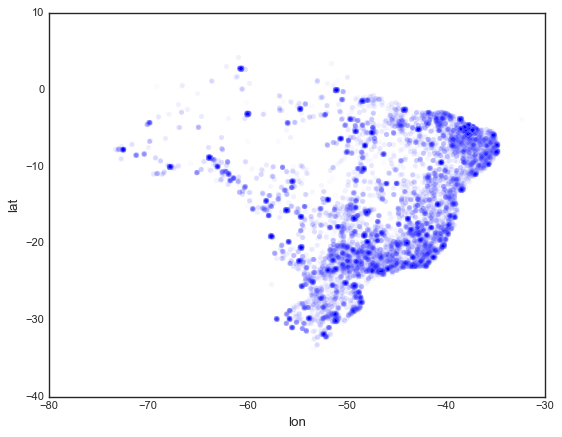

In [126]:
sns.scatterplot(x="lon", y="lat", data=acq_train[~acq_train['target_default'].isna()], alpha=0.02)

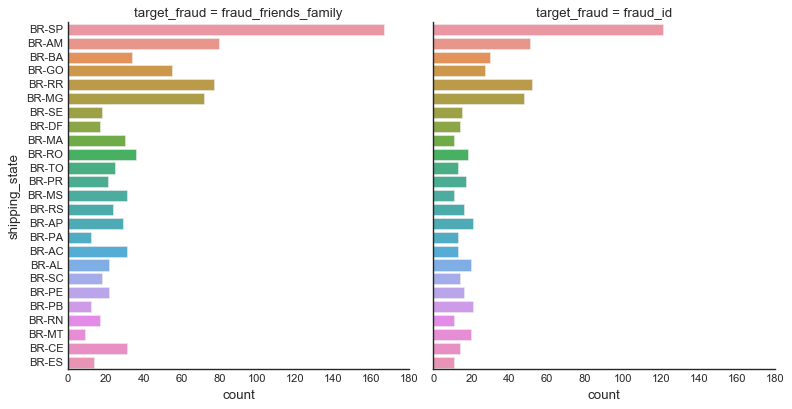

In [147]:
#plt.figure(figsize=(30,6))
sns.catplot(y="shipping_state", kind="count",
            col="target_fraud", data=acq_train,
            order = acq_train['shipping_state'].value_counts().index)

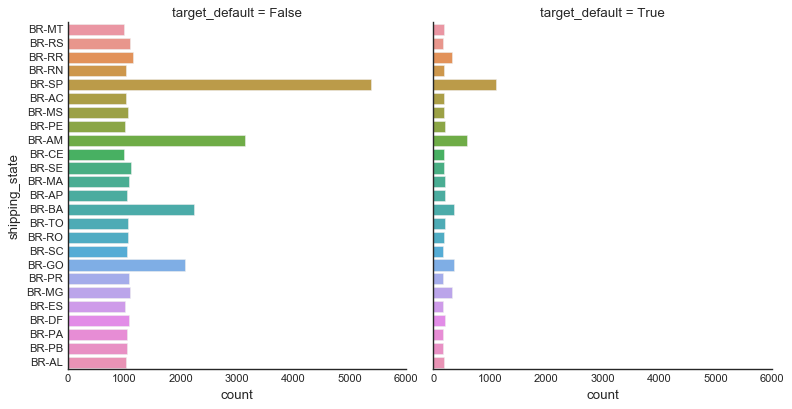

In [154]:
sns.catplot(y="shipping_state", kind="count",
            col="target_default", data=acq_train)

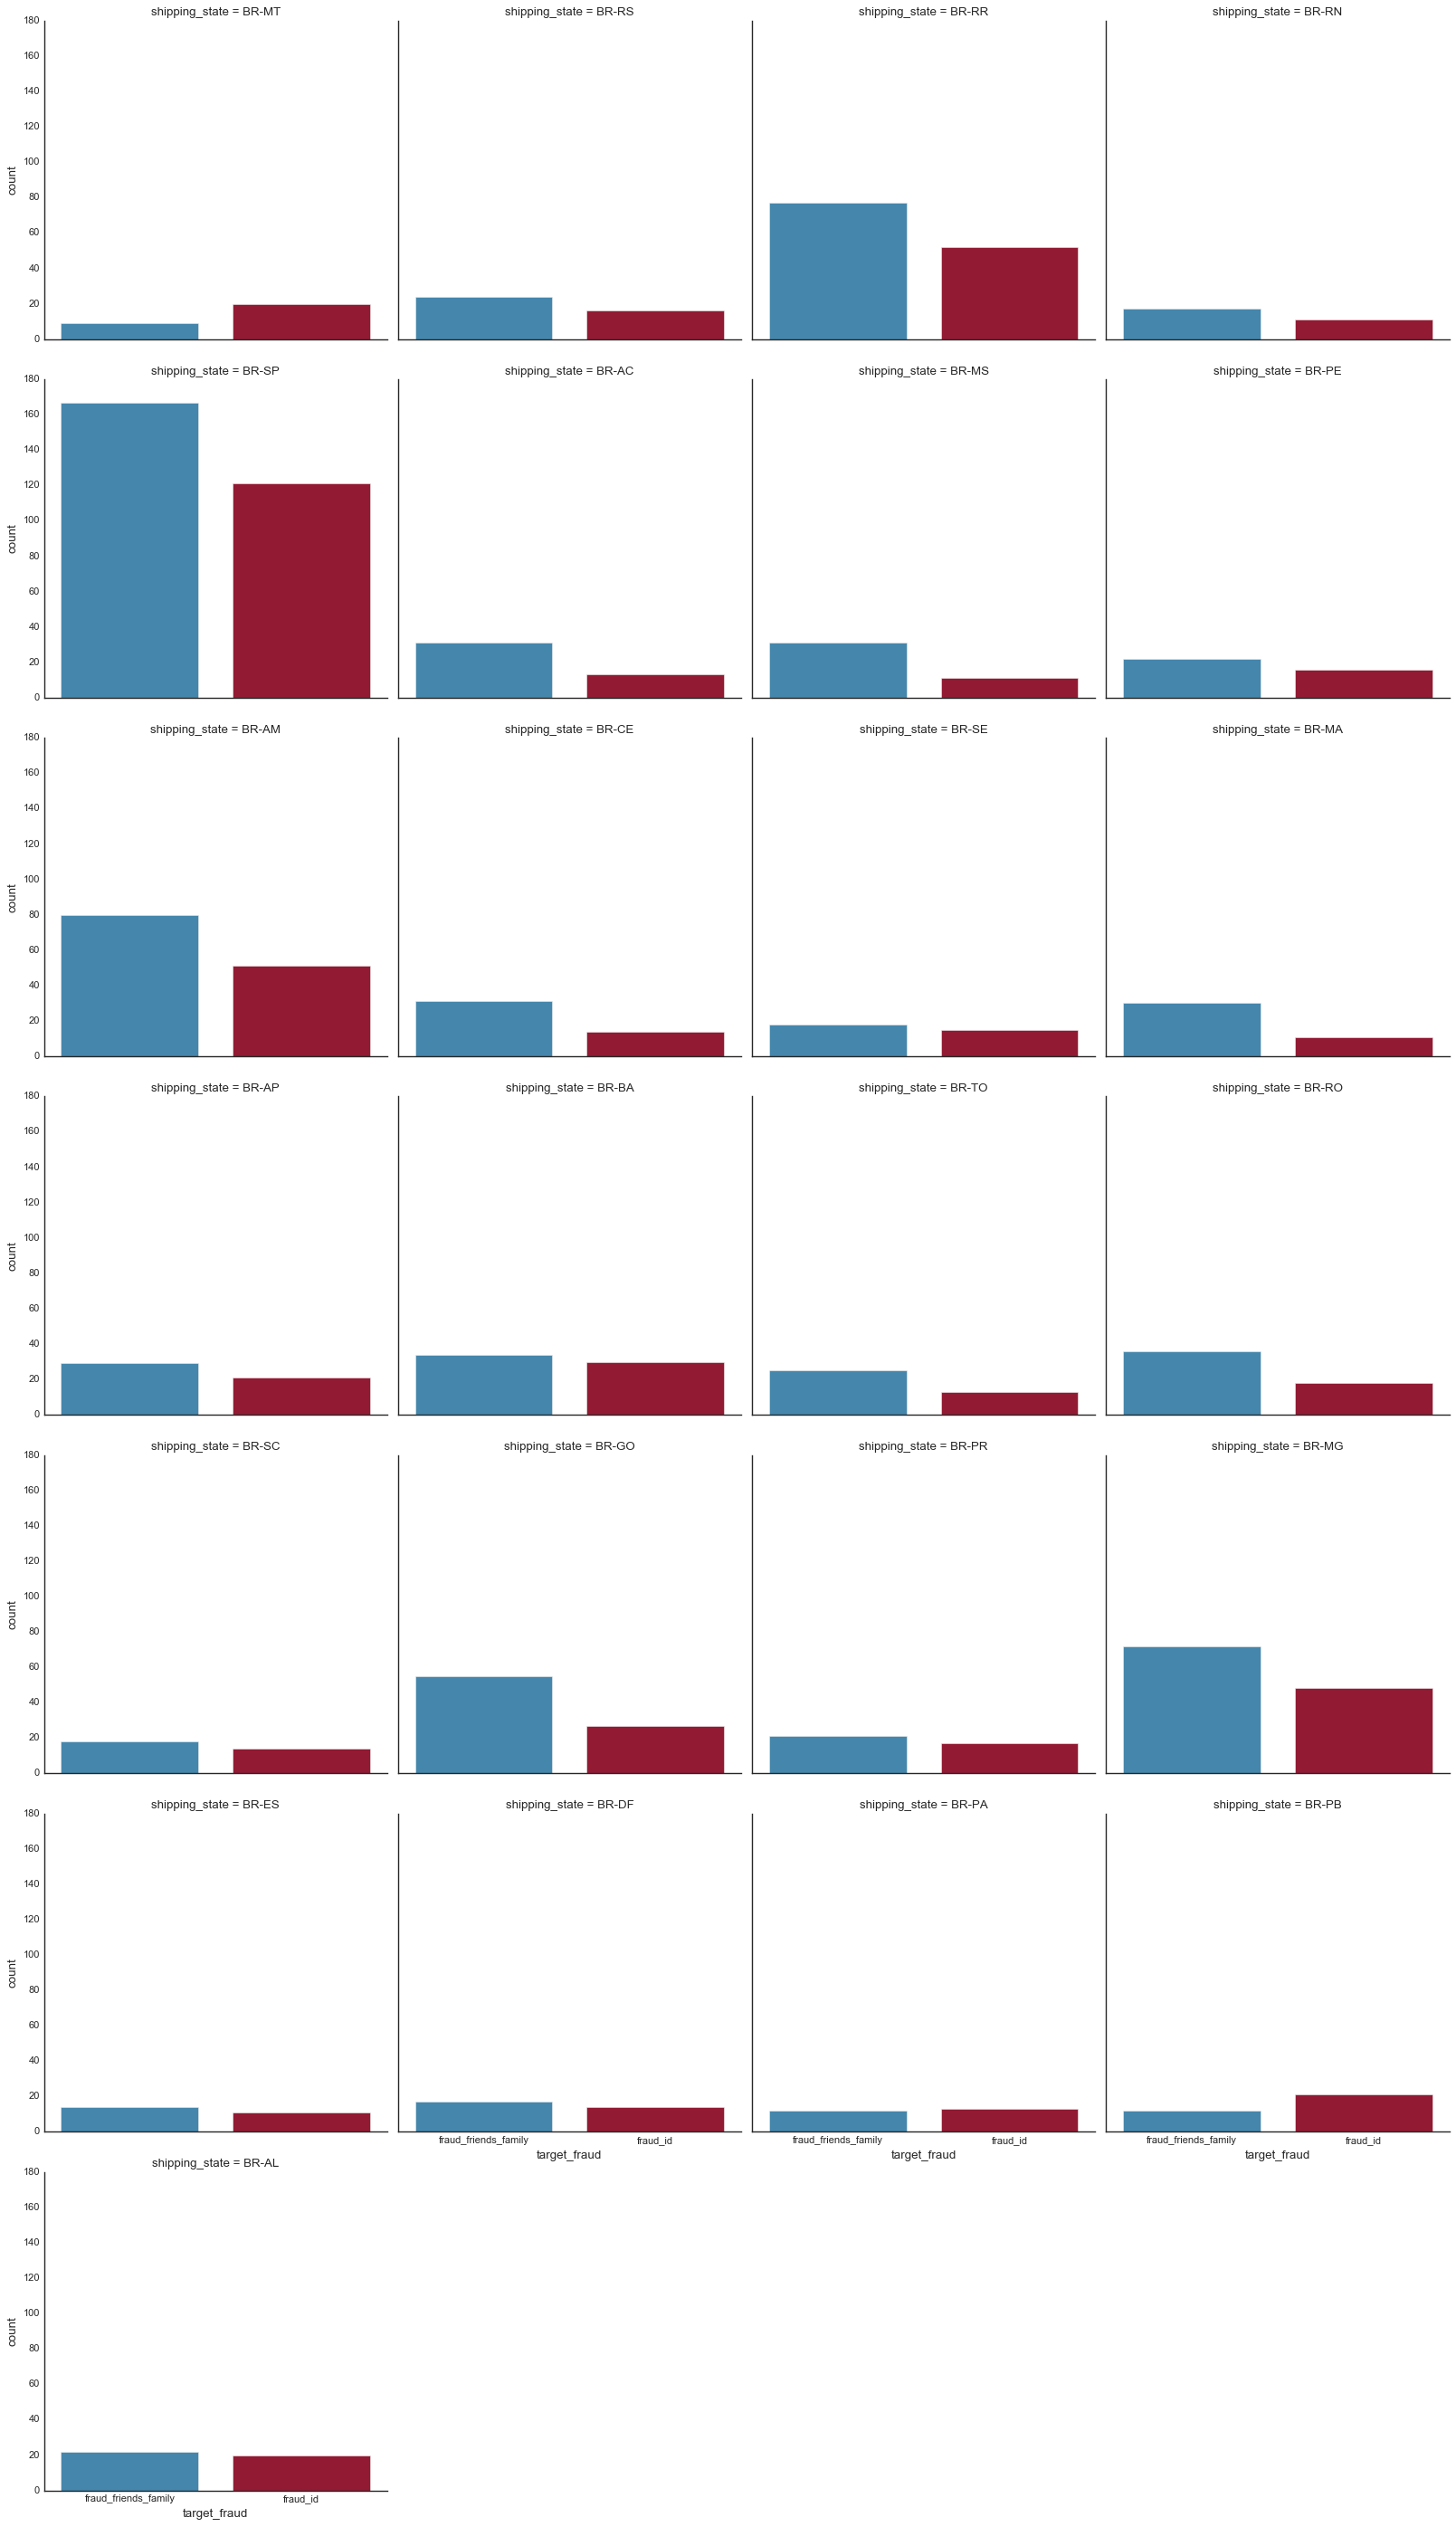

In [151]:
sns.catplot(x="target_fraud", kind="count", col_wrap=4,
            col="shipping_state", data=acq_train)

In [ ]:
MT e PB 